<a href="https://colab.research.google.com/github/MoMus2000/All-things-autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train /255.0
X_test = X_test /255.0

In [11]:
x = np.ndarray.flatten(X_train)
print(x.shape)
# Means 60k*28*2860

(47040000,)


In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(300, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))



decoder = Sequential()
decoder.add(Dense(50, input_shape = [25],activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(300, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

auto_encoder = Sequential([encoder,decoder])
auto_encoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5))



In [13]:
auto_encoder.fit(X_train,X_train,epochs=15,validation_data=(X_test,X_test))

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2588 - val_loss: 0.2283
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2145 - val_loss: 0.2046
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1826 - val_loss: 0.1700
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1636 - val_loss: 0.1563
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1534 - val_loss: 0.1509
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1479 - val_loss: 0.1439
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1443 - val_loss: 0.1418
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1418 - val_loss: 0.1413
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1398 - val_loss: 0.1388
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.137

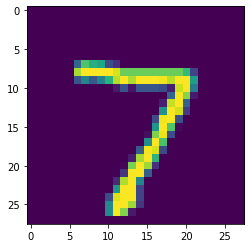

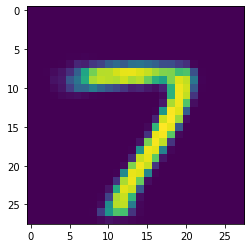

In [14]:
passed_images = auto_encoder.predict(X_test[:10])
n=0
plt.imshow(X_test[n])
plt.show()
plt.imshow(passed_images[n])
plt.show()

In [17]:
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_14 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_15 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)               

In [19]:
from tensorflow.keras import Model
layer_name = 'dense_19'
intermediate_layer_model = Model(inputs=encoder.input,outputs=encoder.get_layer(layer_name).output)

In [20]:
intermediate_output = intermediate_layer_model.predict(X_test)

In [21]:
intermediate_output.shape

(10000, 25)

In [22]:
!pip install bokeh

In [23]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [26]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 2.458s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.180226
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.740120
[t-SNE] KL divergence after 1000 iterations: 1.651117


In [28]:
import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = y_test

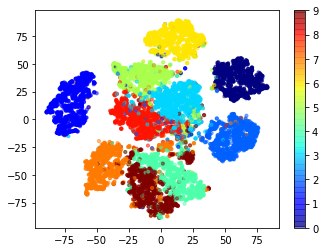

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_df['x'], tsne_df['y'], 
            alpha=0.5, c=y_test, cmap=cmap, s=10)
plt.colorbar()